<a href="https://colab.research.google.com/github/007sanjib/007sanjib/blob/main/Project_8_Plant_Seedling_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Description – Image classification using CNNs in Keras

## Data Description:
You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.

##Dataset:
The dataset can be download from Olympus. The data file names are:

 images.npy

 Label.csv

The original files are from Kaggle. Due to the large volume of data, the images were converted to images.npy file and the labels are also put into the Labels.csv. So that you can work on the data/project seamlessly without worrying about the high data volume.


Link to the Kaggle project site: https://www.kaggle.com/c/plant-seedlings-classification/data?select=train


## Context:
Can you differentiate a weed from a crop seedling?
The ability to do so effectively can mean better crop yields and better stewardship of the environment.
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages

## Objective:
To implement the techniques learnt as a part of the course.

## Learning Outcomes:

 Pre-processing of image data.

 Visualization of images.

 Building CNN.

 Evaluate the Model.

 The motive of the project is to make the learners capable to handle images/image classification problems, during this process you should also be capable to handle real image files, not just limited to a numpy array of image pixels.
Guide to solve the project seamlessly:
Here are the points which will help you to solve the problem efficiently:

 Read the problem statement carefully from start to end (including the note at the end). The highlighted part in the attached problem statement should not be missed.

 Download the dataset from the Olympus platform.

 Upload the "images.npy" and “Labels.csv” file to google drive.

 Then you can use the dataset path in the Google Colab notebook to do further steps related to project problem
statement.

 You can set runtime type to “GPU” in Google Colab, so that the code will run faster as you will be using CNN to fit your
model.

## Steps and tasks:
1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)
2. Data Pre-processing: (15 Marks)
  
  a. Normalization.
  b. Gaussian Blurring.
  c. Visualize data after pre-processing.
3. Make data compatible: (10 Marks)

  a. Convert labels to one-hot-vectors.
  
  b. Print the label for y_train[0].
  
  c. Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data
into test and validation set with test_size = 0.5)

  d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s
already in the compatible shape, then comment in the notebook that it’s already in compatible shape.

4. Building CNN: (15 Marks)

  a. Define layers.
  
  b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

5. Fit and evaluate model and print confusion matrix. (10 Marks)
6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)

## Note:

 Download the train images from the Olympus Platform.

 Do not download the dataset from Kaggle, as:

o The dataset is big.

o The dataset has 2 files for train and test images, but the labels are only for the train file. Test file has no
labels associated with it. So, when you want to know the accuracy of model on test images, there’s no way to measure it. That’s why the data provided to you on Olympus has only train images and their labels. For our purpose we use this for our training and testing and validation purpose.

Happy Learning!

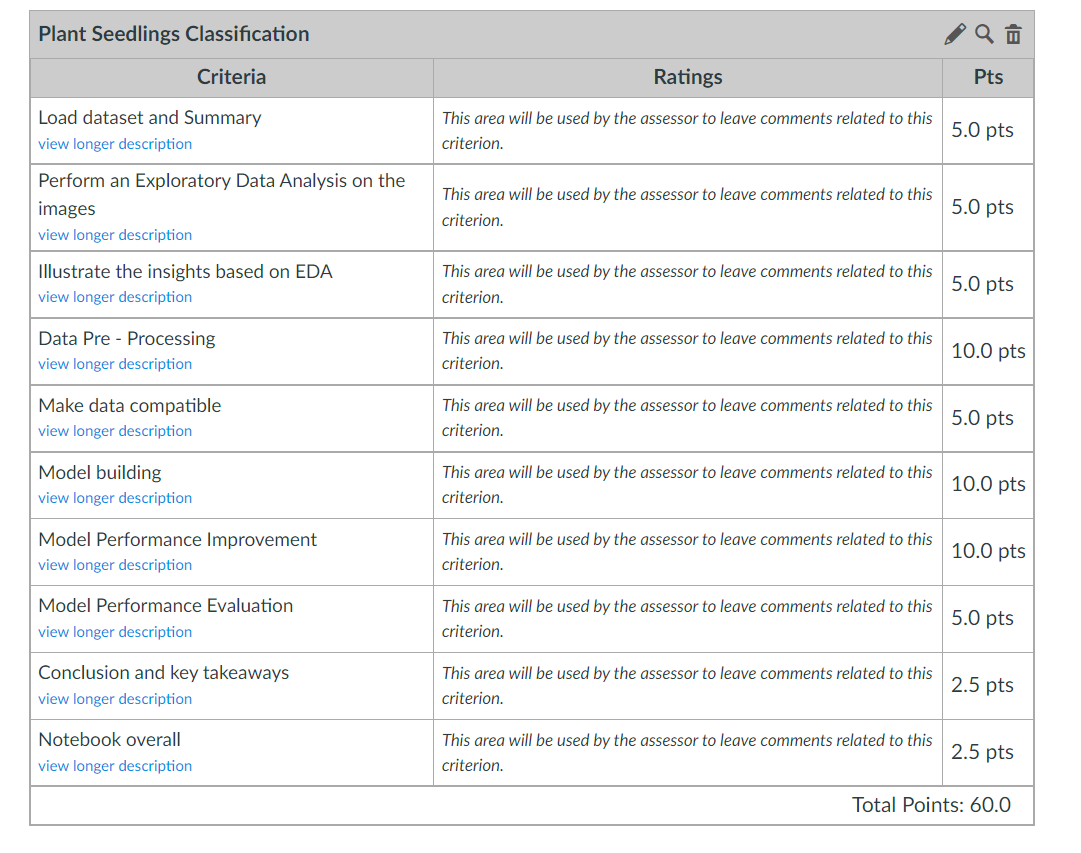

# Project Solution - The answer by Sanjib:

Date : Oct-08-2021

Author : Sanjib K Basu

*Note: Google Colab provides Table of Contents on the left top menu*



# 1. Overview of the Dataset

In [ ]:
# Import necessary libraries.
import cv2
from google.colab.patches import cv2_imshow

import os

import pandas as pd
import numpy as np

import copy

import seaborn as sns # for data visualization
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential #sequential api for sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam #optimiers for optimizing the model
from keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
from keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    f1_score
)

import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
%matplotlib inline

pd.set_option('display.max_colwidth', None) # prints the DataFrame cells with full text, none of its values truncated.
pd.set_option('display.max_columns', 100) # prints upto 100 columns
pd.set_option('display.max_rows', 200) # prints upto 200 rows
pd.set_option('display.colheader_justify', 'left') # dataframe column header left justified

pd.options.display.float_format = (
    "{:,.4f}".format
)  # format upto 4 decimals of float numbers


In [ ]:
# mount the G drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls drive/MyDrive/Colab\ Notebooks/UT-Austin/data


 images.npy
 Labels.csv
'Problem Statement - Plant Seedlings Image Classification using CNNs in Keras.pdf'


In [ ]:
df_labels = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UT-Austin/data/Labels.csv")

df_labels

Label                     
0     Small-flowered Cranesbill
1     Small-flowered Cranesbill
2     Small-flowered Cranesbill
3     Small-flowered Cranesbill
4     Small-flowered Cranesbill
...                         ...
4745           Loose Silky-bent
4746           Loose Silky-bent
4747           Loose Silky-bent
4748           Loose Silky-bent
4749           Loose Silky-bent

[4750 rows x 1 columns]

In [ ]:
df_labels.info() # checking null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4750 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


In [ ]:

CATEGORIES = list(pd.unique(df_labels["Label"]))
CATEGORIES

['Small-flowered Cranesbill',
 'Fat Hen',
 'Shepherds Purse',
 'Common wheat',
 'Common Chickweed',
 'Charlock',
 'Cleavers',
 'Scentless Mayweed',
 'Sugar beet',
 'Maize',
 'Black-grass',
 'Loose Silky-bent']

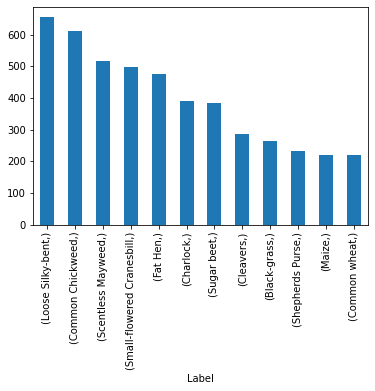

In [ ]:
# [print(i) for i in list(pd.unique(df_labels["Label"]))]
df_labels.value_counts().plot(kind="bar")

In [ ]:
df_labels.value_counts(normalize=True)

Label                    
Loose Silky-bent            0.1377
Common Chickweed            0.1286
Scentless Mayweed           0.1086
Small-flowered Cranesbill   0.1044
Fat Hen                     0.1000
Charlock                    0.0821
Sugar beet                  0.0811
Cleavers                    0.0604
Black-grass                 0.0554
Shepherds Purse             0.0486
Maize                       0.0465
Common wheat                0.0465
dtype: float64

### Observation by Sanjib:
1. 12 labels (classes) of little imbalance, lower magnitude.
2. Images are of same size, and colored RGB.

In [ ]:
img = np.load("/content/drive/MyDrive/Colab Notebooks/UT-Austin/data/images.npy")

In [ ]:
img

array([[[[ 35,  52,  78],
         [ 36,  49,  76],
         [ 31,  45,  69],
         ...,
         [ 78,  95, 114],
         [ 76,  93, 110],
         [ 80,  95, 109]],

        [[ 33,  46,  68],
         [ 37,  50,  73],
         [ 48,  65,  83],
         ...,
         [ 81,  96, 113],
         [ 74,  89, 105],
         [ 83,  95, 109]],

        [[ 34,  50,  68],
         [ 35,  52,  72],
         [ 70,  85, 101],
         ...,
         [ 83,  97, 112],
         [ 79,  94, 108],
         [ 79,  94, 107]],

        ...,

        [[ 35,  50,  69],
         [ 42,  57,  73],
         [ 42,  57,  72],
         ...,
         [ 60,  76,  92],
         [ 67,  81,  97],
         [ 64,  77,  95]],

        [[ 36,  52,  67],
         [ 48,  63,  78],
         [ 41,  57,  73],
         ...,
         [ 44,  66,  83],
         [ 58,  76,  91],
         [ 57,  74,  90]],

        [[ 44,  58,  70],
         [ 43,  57,  73],
         [ 40,  55,  72],
         ...,
         [ 41,  70,  92],
        

In [ ]:
img.shape

(4750, 128, 128, 3)

========== 0 Small-flowered Cranesbill


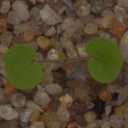

========== 100 Small-flowered Cranesbill


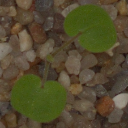

========== 500 Fat Hen


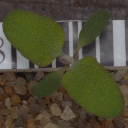

========== 1000 Shepherds Purse


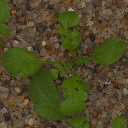

========== 1500 Common Chickweed


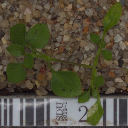

========== 2000 Common Chickweed


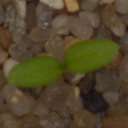

========== 2500 Cleavers


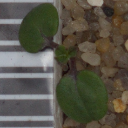

========== 3000 Scentless Mayweed


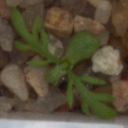

========== 3500 Sugar beet


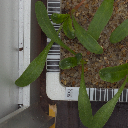

========== 4000 Black-grass


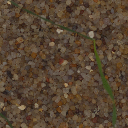

========== 4500 Loose Silky-bent


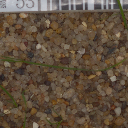

========== 4749 Loose Silky-bent


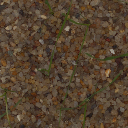

<Figure size 864x864 with 0 Axes>

In [ ]:
# df_labels.iloc[0]

fig = plt.figure(figsize = (12,12))

# ax = fig.add_subplot( 4, 3, i+1)
count = 0

# Plot random samples of 12 images
for i in [0, 100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 4749]:
  # print(i,"="*40)
  # count = count + 1
  # ax = fig.add_subplot(4, 3, count)
  # plt.title(str(i) + "# " + df_labels.iloc[i,0])
  # plt.axis('off')
  # plt.imshow(img[i])
  print("="*10,i, df_labels.iloc[i,0])
  cv2_imshow(img[i])

plt.show()

#2. Exploratory Data Analysis

Printing images of Cleavers
Indices of plant-image Cleavers are in the range : 2424 2710 . Samples:
[2447 2449 2466 2491 2496 2527 2599 2609 2620 2635]


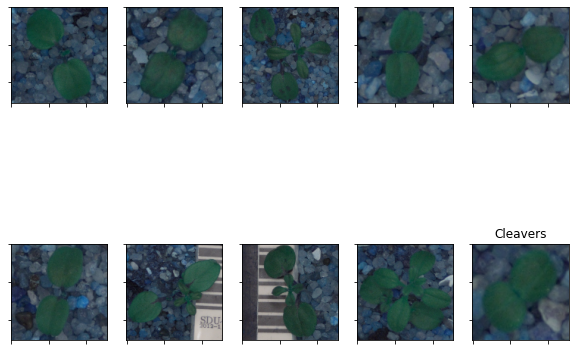

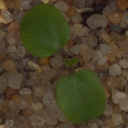

CPU times: user 1.23 s, sys: 44.3 ms, total: 1.28 s
Wall time: 1.29 s


In [ ]:
%%time

# Reusable function

def plot_for_class(label, df_labels, img,
                   no_rows = 2, no_cols = 5):

    """
      Description:
        For a given class (plant type), the function displays
        number of sample images, in a grid of nb_rows and
        nb_cols

      Parameters:
        label : str = The class (plant type)
        df_ladels : pd.DataFrame = The label (class) of each image
        img : np.array = The array of images
        no_rows : int = The number of rows in display grid
        no_cols : int = The number of columns in display grid

      Returns:
        None (display only)
    """
    print("Printing images of", label)

    fig, axs = plt.subplots(no_rows, no_cols, figsize=(10, 5))

    label_indexes = df_labels[ df_labels["Label"] == label ].index
    print("Indices of plant-image",label,
          "are in the range :",np.amin(label_indexes),
          np.amax(label_indexes), ". Samples:")
    # pick random samples
    label_indexes = np.random.choice(label_indexes,
                                     no_rows * no_cols)
    label_indexes = np.sort(label_indexes)
    print(label_indexes)


    n = 0
    for i in range(0, no_rows):
        for j in range(0, no_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])

            axs[i, j].imshow(img[label_indexes[n]])
            n += 1
    plt.title(label)
    plt.show()
    cv2_imshow(img[label_indexes[0]])

# Testing the function
plot_for_class("Cleavers", df_labels, img)

Printing images of Small-flowered Cranesbill
Indices of plant-image Small-flowered Cranesbill are in the range : 0 495 . Samples:
[  0  68 167 218 383 391 392 428 432 486]


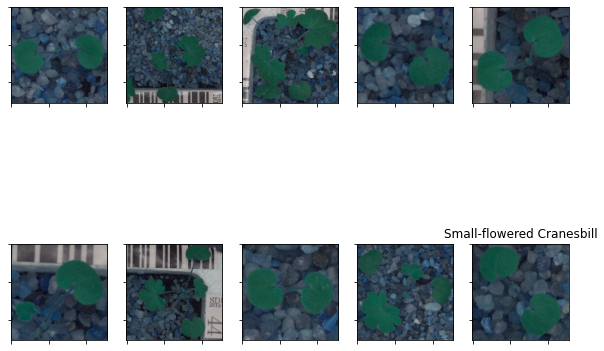

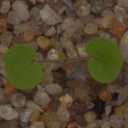

Printing images of Fat Hen
Indices of plant-image Fat Hen are in the range : 496 970 . Samples:
[502 540 571 687 746 771 807 808 821 940]


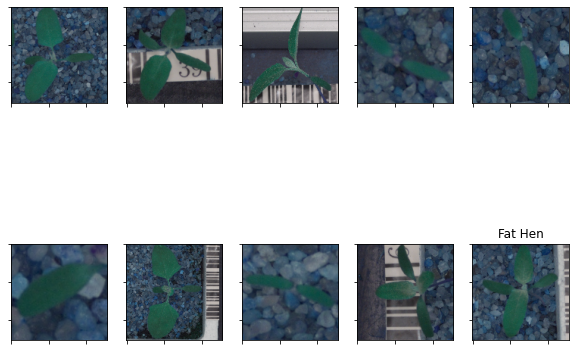

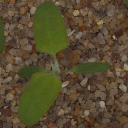

Printing images of Shepherds Purse
Indices of plant-image Shepherds Purse are in the range : 971 1201 . Samples:
[1005 1027 1083 1123 1152 1154 1160 1163 1172 1177]


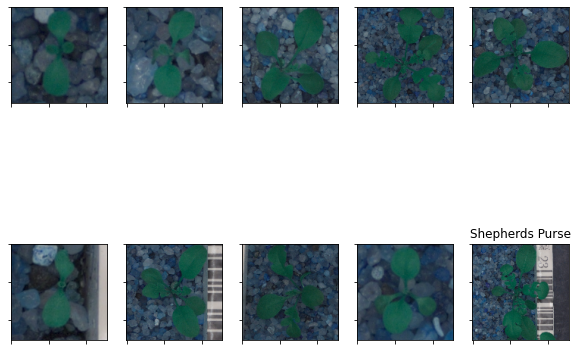

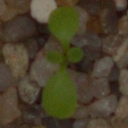

Printing images of Common wheat
Indices of plant-image Common wheat are in the range : 1202 1422 . Samples:
[1203 1206 1240 1274 1285 1289 1339 1378 1394 1397]


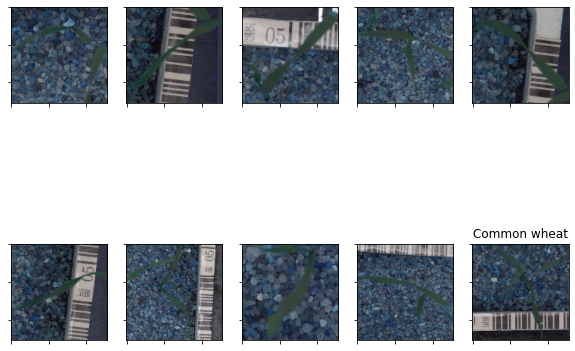

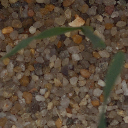

Printing images of Common Chickweed
Indices of plant-image Common Chickweed are in the range : 1423 2033 . Samples:
[1702 1740 1772 1797 1814 1823 1871 1945 2006 2027]


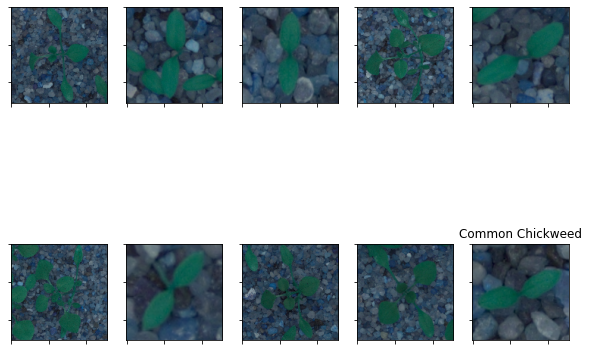

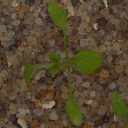

Printing images of Charlock
Indices of plant-image Charlock are in the range : 2034 2423 . Samples:
[2053 2101 2126 2183 2185 2253 2258 2281 2390 2413]


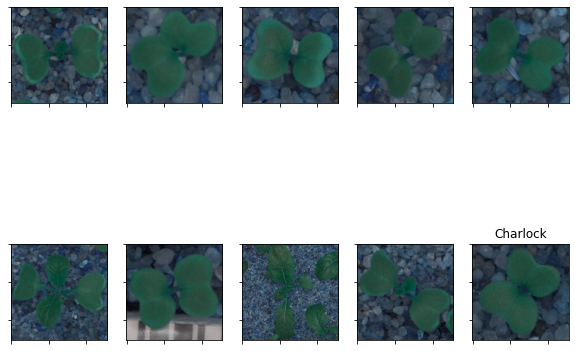

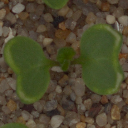

Printing images of Cleavers
Indices of plant-image Cleavers are in the range : 2424 2710 . Samples:
[2428 2445 2457 2507 2547 2554 2609 2653 2699 2710]


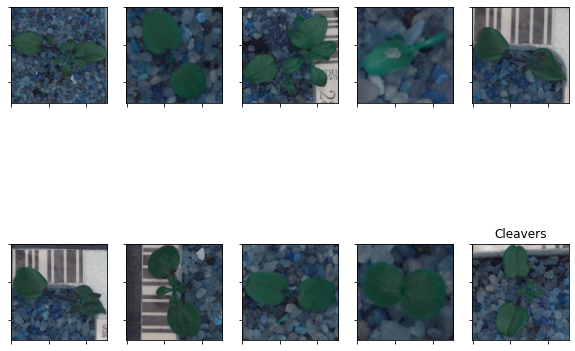

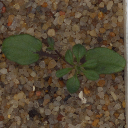

Printing images of Scentless Mayweed
Indices of plant-image Scentless Mayweed are in the range : 2711 3226 . Samples:
[2746 2758 2818 2914 2971 2987 3020 3060 3104 3167]


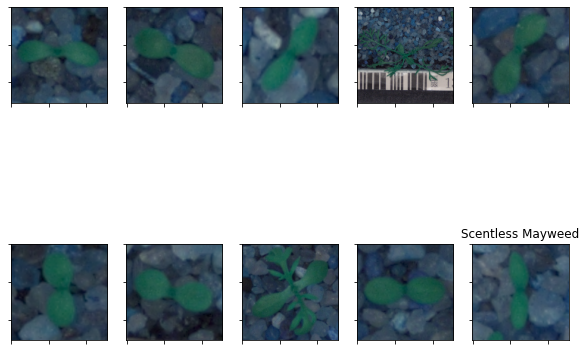

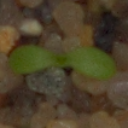

Printing images of Sugar beet
Indices of plant-image Sugar beet are in the range : 3227 3611 . Samples:
[3266 3270 3281 3281 3358 3363 3442 3477 3512 3562]


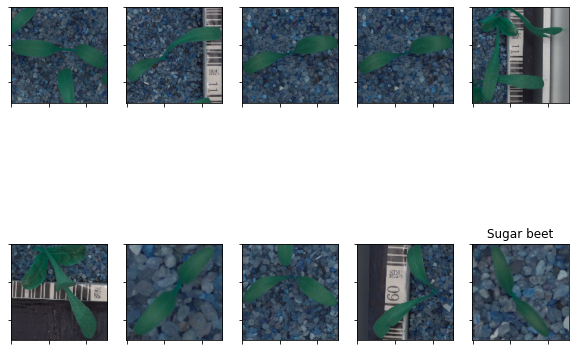

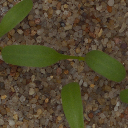

Printing images of Maize
Indices of plant-image Maize are in the range : 3612 3832 . Samples:
[3656 3712 3729 3747 3761 3778 3809 3810 3821 3831]


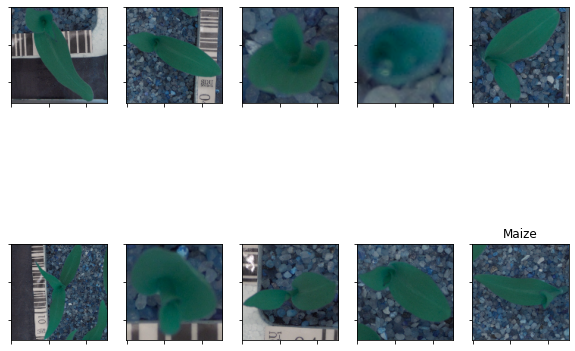

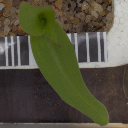

Printing images of Black-grass
Indices of plant-image Black-grass are in the range : 3833 4095 . Samples:
[3845 3862 3939 3967 4002 4013 4023 4047 4059 4085]


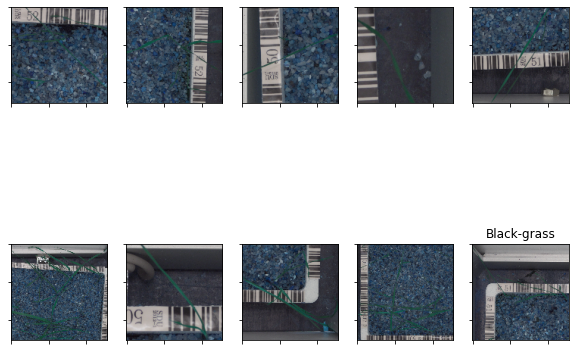

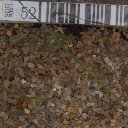

Printing images of Loose Silky-bent
Indices of plant-image Loose Silky-bent are in the range : 4096 4749 . Samples:
[4101 4145 4330 4428 4445 4534 4582 4593 4625 4718]


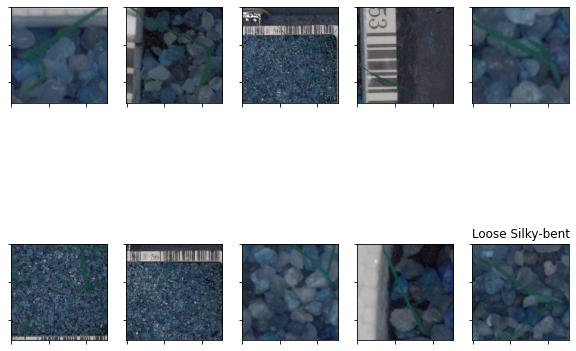

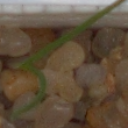

CPU times: user 15.7 s, sys: 335 ms, total: 16 s
Wall time: 16.1 s


[None, None, None, None, None, None, None, None, None, None, None, None]

In [ ]:
%%time

# Plot every class of plants
[plot_for_class(i, df_labels, img) for
 i in list(pd.unique(df_labels["Label"])) ]

### Observation by Sanjib:

1. All the plants are of color Green. The color plays a significant role in identifying object; hence, converting the images into Grayscale is not a good idea.
2. The backgounds are having sharp gradients sometimes. Every type of plants have various backgrounds. The backgrounds contain no information to classify the plants.
3. The shape of each class of plants are distinct.
4. The blurness of the images varies.  
5. The plan objects are sometimes near the boudaries of the images. Padding would be a good idea.

(128, 128, 3) Original image is layered on each of the 3 color channels B,G,R


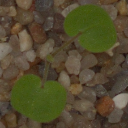

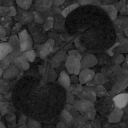

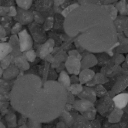

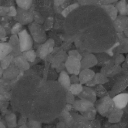

In [ ]:


def numeric_plot_image (image_array):
  """
    Description : Plots layers of the image
    Parameter :
      image_array : np.array = image in the form of numeric array
  """

  # fig, axs = plt.subplots(1, 4, figsize=(12, 12))
  # im = ax.imshow(image_array)

  print(image_array.shape,
        "Original image is layered on each of the 3 color channels B,G,R")
  # axs[ 0].imshow(image_array)
  cv2_imshow(image_array)
  for j in range(0, 3): # R G B seperate plot
      # axs[ j+1].imshow(image_array[:,:,j])
      cv2_imshow(image_array[:,:,j])

  # plt.show()

# Testing the function
numeric_plot_image(img[100])

[182, 1711, 4041, 2647, 3332, 233, 3960, 4565, 4181, 1694]
(128, 128, 3) Original image is layered on each of the 3 color channels B,G,R


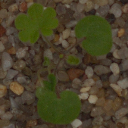

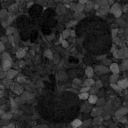

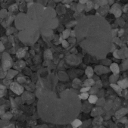

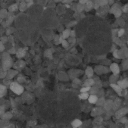

(128, 128, 3) Original image is layered on each of the 3 color channels B,G,R


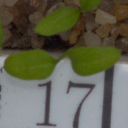

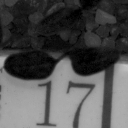

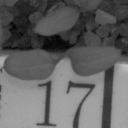

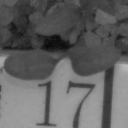

(128, 128, 3) Original image is layered on each of the 3 color channels B,G,R


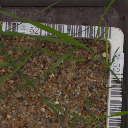

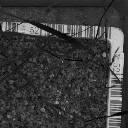

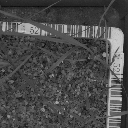

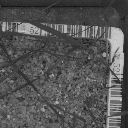

(128, 128, 3) Original image is layered on each of the 3 color channels B,G,R


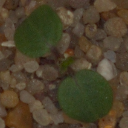

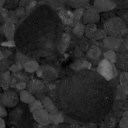

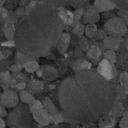

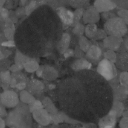

(128, 128, 3) Original image is layered on each of the 3 color channels B,G,R


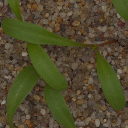

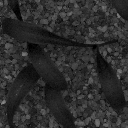

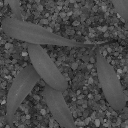

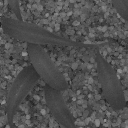

(128, 128, 3) Original image is layered on each of the 3 color channels B,G,R


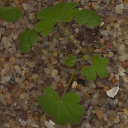

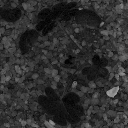

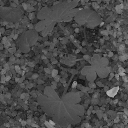

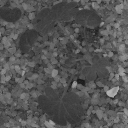

(128, 128, 3) Original image is layered on each of the 3 color channels B,G,R


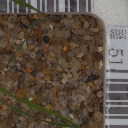

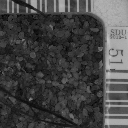

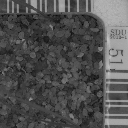

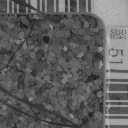

(128, 128, 3) Original image is layered on each of the 3 color channels B,G,R


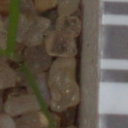

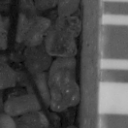

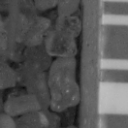

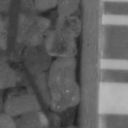

(128, 128, 3) Original image is layered on each of the 3 color channels B,G,R


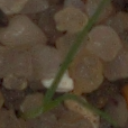

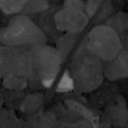

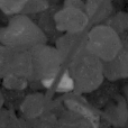

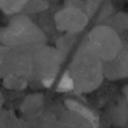

(128, 128, 3) Original image is layered on each of the 3 color channels B,G,R


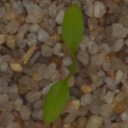

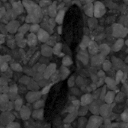

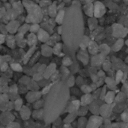

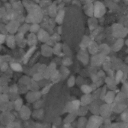

CPU times: user 247 ms, sys: 19.6 ms, total: 267 ms
Wall time: 467 ms


In [ ]:
%%time

# Plot random 10 plants in individual color channels
random_index = list(np.random.choice(np.arange(img.shape[0]),10))
print(random_index)
for i in random_index:
  numeric_plot_image(img[i])

## 2.1 Mean Image of each Image-class and Contrast Difference

Note : By observing the images above, the plants are located in various positions of the images (row, column). Hence the mean image may not be displayed as a plant.

Mean Imgage of Small-flowered Cranesbill (128, 128, 3)


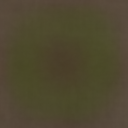

In [ ]:
# Reusable Function
def find_mean_img(full_mat, title):
    """
      Description:
        Find the mean image
      Parameters:
        full_mat : np.array =  Tensor of the image
        title : str = Title of Image
      Return:
        1. mean_img : np.array
        2. display in the Notebook

    """
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape((128,128,3))
    print("Mean Imgage of", title, mean_img.shape)

    cv2_imshow(mean_img)

    return mean_img




# Unit testing of the function
mean_img = find_mean_img(img[0:495,:,:,:], "Small-flowered Cranesbill")

Mean Imgage of Small-flowered Cranesbill (128, 128, 3)


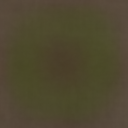

Mean Imgage of Fat Hen (128, 128, 3)


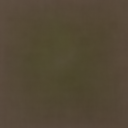

Mean Imgage of Shepherds Purse (128, 128, 3)


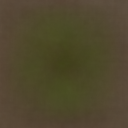

Mean Imgage of Common wheat (128, 128, 3)


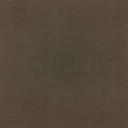

Mean Imgage of Common Chickweed (128, 128, 3)


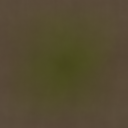

Mean Imgage of Charlock (128, 128, 3)


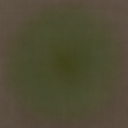

Mean Imgage of Cleavers (128, 128, 3)


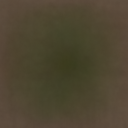

Mean Imgage of Scentless Mayweed (128, 128, 3)


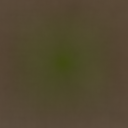

Mean Imgage of Sugar beet (128, 128, 3)


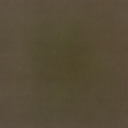

Mean Imgage of Maize (128, 128, 3)


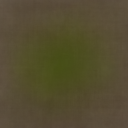

Mean Imgage of Black-grass (128, 128, 3)


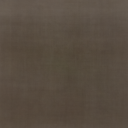

Mean Imgage of Loose Silky-bent (128, 128, 3)


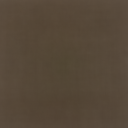

CPU times: user 476 ms, sys: 15.3 ms, total: 491 ms
Wall time: 539 ms


In [ ]:
%%time
mean_img_array = []


# Plot every class of plants
for label in list(pd.unique(df_labels["Label"])) :
  label_indexes = df_labels[ df_labels["Label"] == label ].index
  mean_img_array.append(
      find_mean_img(img[np.amin(label_indexes):np.amax(label_indexes),:,:,:],
      label) )

### Observation by Sanjib:

1. The "Black-grass" and "Loose Silky-bent" has less green area in mean image because they are thin plants, as observed previously.
2. The "Maize", "Scentless Mayweed", "Shepherds Purse" and "Common Chickweed" has more green area in mean image they are wider and compact green plants, as observed previously.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


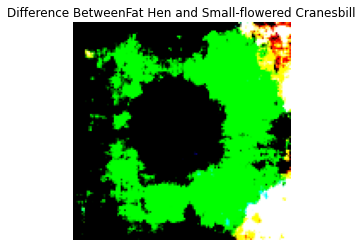

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


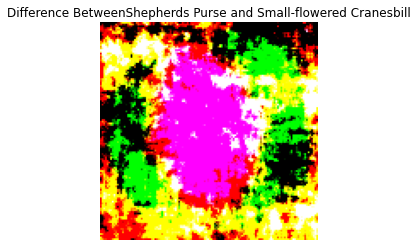

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


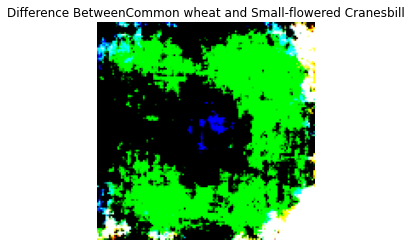

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


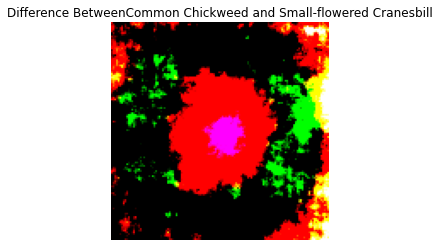

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


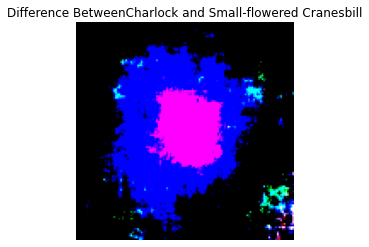

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


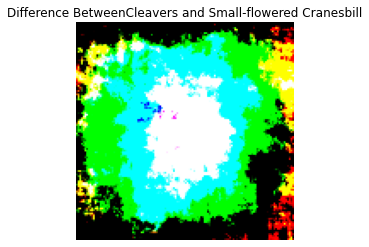

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


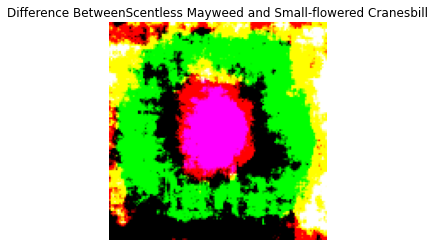

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


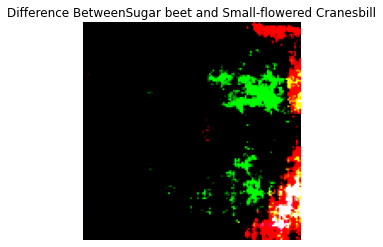

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


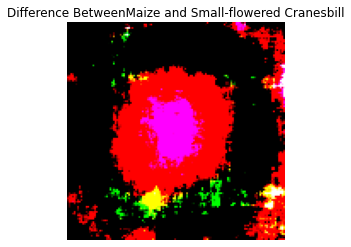

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


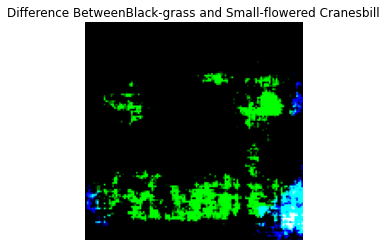

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


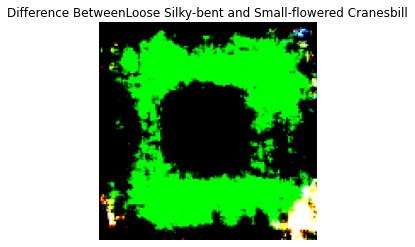

In [ ]:
# %%time

# fig = plt.figure(figsize = (8,6))

image_classes = list(pd.unique(df_labels["Label"]))
n=0

# Contrast with "Small-flowered Cranesbill"
for i in mean_img_array:
  if n >0 :
      # contrast_mean = np.mod(mean_img_array[0], i)
      contrast_mean = mean_img_array[0] - i
      plt.imshow(contrast_mean,
                 cmap='bwr')
      # cv2_imshow(contrast_mean)
      plt.title('Difference Between' +
                image_classes[n] +
                ' and Small-flowered Cranesbill')


      plt.axis('off')
      plt.show()

  n += 1

### Observation by Sanjib :

1. ?? The black area represents no difference (0 value) between mean imgages. More black area in contrast signify similarity between mean images.

#3. Data Processing

3.1 Gaussian Blurring

3.2 Noralization

3.3 On Hot Encoding

##3.1 Gaussian Blurring

Gaussian Blurring: Gaussian blur is the result of blurring an image by a Gaussian function.
It is a widely used effect in graphics software, typically to reduce image noise and reduce detail. It is also used as a preprocessing stage before applying our machine learning or deep learning models.

******************** 0


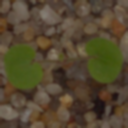

******************** 1000


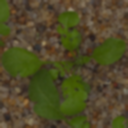

******************** 2000


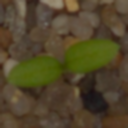

******************** 3000


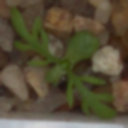

******************** 4000


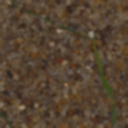

In [ ]:
images_Gaussian = copy.deepcopy(img)

for i in range( img.shape[0] ):
  images_Gaussian[i] = cv2.GaussianBlur(img[i], (5, 5), 0)
  if i % 1000 == 0: # Show every 1000th image only
    print("*"*20,i)
    # plt.imshow(images_Gaussian[i] )
    # plt.show()
    cv2_imshow(images_Gaussian[i])

##3.2 Normalization

Bringing pixel values in the range [0 : 1]

In [ ]:
## Normalizing pixel values
imgages_Gaussian_normalized = images_Gaussian/255.0
del images_Gaussian
imgages_Gaussian_normalized[100] # print 100th image as sample

array([[[0.17254902, 0.22352941, 0.28627451],
        [0.16862745, 0.21960784, 0.28235294],
        [0.16470588, 0.21176471, 0.27058824],
        ...,
        [0.18823529, 0.28627451, 0.34117647],
        [0.15686275, 0.23529412, 0.29019608],
        [0.14509804, 0.21176471, 0.27058824]],

       [[0.17254902, 0.22352941, 0.28627451],
        [0.16862745, 0.21960784, 0.27843137],
        [0.16078431, 0.21176471, 0.27058824],
        ...,
        [0.18431373, 0.28627451, 0.34509804],
        [0.15686275, 0.23921569, 0.29803922],
        [0.14509804, 0.21568627, 0.2745098 ]],

       [[0.16470588, 0.22352941, 0.28235294],
        [0.16078431, 0.21568627, 0.2745098 ],
        [0.15294118, 0.20784314, 0.26666667],
        ...,
        [0.18039216, 0.29019608, 0.36078431],
        [0.15686275, 0.24705882, 0.31372549],
        [0.14901961, 0.23137255, 0.29411765]],

       ...,

       [[0.27843137, 0.3372549 , 0.40392157],
        [0.27058824, 0.32941176, 0.4       ],
        [0.25098039, 0

##3.3 One Hot Encoding


In [ ]:
# The classes of Images
df_labels.value_counts()


Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
dtype: int64

In [ ]:

# Convert the classes into integers
df_int_labels =  df_labels["Label"].replace(
              {"Loose Silky-bent" : 0,
               "Common Chickweed" : 1,
               "Scentless Mayweed" : 2,
               "Small-flowered Cranesbill" : 3,
               "Fat Hen" : 4,
               "Charlock" : 5,
               "Sugar beet" : 6,
               "Cleavers" : 7,
               "Black-grass" : 8,
               "Shepherds Purse" : 9,
               "Maize" : 10,
               "Common wheat" : 11
               }).astype("uint8")
df_int_labels.value_counts()

0     654
1     611
2     516
3     496
4     475
5     390
6     385
7     287
8     263
9     231
11    221
10    221
Name: Label, dtype: int64

In [ ]:

#One Hot encoding
y_encoded = to_categorical(df_int_labels.to_numpy())
y_encoded.shape

(4750, 12)

In [ ]:
#Display encoded values
pd.DataFrame(y_encoded).sample(10)

0      1      2      3      4      5      6      7      8      9      \
2129 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000   
2143 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000   
661  0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
3861 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000   
1718 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
940  0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
3401 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000   
3620 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
2544 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000   
884  0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

      10     11     
2129 0.0000 0.0000  
2143 0.0000 0.0000  
661  0.0000 0.0000  
3861 0.0000 0.0000  
1718 0.0000 0.0000  
940  0.0000 0.0000  
3401 0.0000 0.0000  
3620 1.0000 0.0000  
2544 0.0000 0.0000  
884  0.0000 0.0000

#4. Data Split into Train, Test, Validation

 Split the dataset into training, testing, and validation set. (Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)

In [ ]:

# Split dataset into train and test, 85 : 15

X_train, X_test, y_train, y_test = train_test_split(
    imgages_Gaussian_normalized, y_encoded, test_size=0.15, random_state=10, stratify=y_encoded
)


print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (4037, 128, 128, 3)
X_test (713, 128, 128, 3)
y_train (4037, 12)
y_test (713, 12)


In [ ]:
# Checking if the class distribution is as balanced as before split
[y_train[:,i].sum() for i in range(0,12)]

[556.0,
 519.0,
 439.0,
 422.0,
 404.0,
 331.0,
 327.0,
 244.0,
 223.0,
 196.0,
 188.0,
 188.0]

In [ ]:
# Checking if the class distribution is as balanced as before split
[y_test[:,i].sum() for i in range(0,12)]

[98.0, 92.0, 77.0, 74.0, 71.0, 59.0, 58.0, 43.0, 40.0, 35.0, 33.0, 33.0]

In [ ]:
"""
  Spliting of Test dataset into validation would take place in the model.
"""


# Split the test dataset into validation and test, 50 : 50

# X_val, X_test, y_val, y_test = train_test_split(
#     X_test, y_test, test_size=0.5, random_state=10, stratify=y_test
# )


# print("X_val", X_val.shape)
# print("X_test", X_test.shape)
# print("y_val", y_val.shape)
# print("y_test", y_test.shape)

'\n  Spliting of Test dataset into validation would take place in the model.\n'

In [ ]:
# Checking if the class distribution is as balanced as before split
# [y_val[:,i].sum() for i in range(0,12)]

In [ ]:
# Checking if the class distribution is as balanced as before split
# [y_test[:,i].sum() for i in range(0,12)]

# 5. Deep Neural Network Model

We would try and tune following models :

1. CNN Model
2. VGG16 tansfer learning model
3. Simple ANN Model


## 5.1 CNN Model : Keras.Sequential



In [ ]:
# To achieve consistency
seed_value = 7

np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [ ]:
# Build CNN multilayer model

cnn_model = Sequential()

cnn_model.add(Conv2D(64, (3,3), activation='relu',
                     padding = 'Same',input_shape=(128, 128, 3)))
cnn_model.add(MaxPool2D(pool_size=(2,2), strides=(2, 2)))
cnn_model.add(Dropout(0.25))
#
cnn_model.add(Conv2D(128, (3,3), activation='relu',
                     padding = 'Same' ))
cnn_model.add(MaxPool2D(pool_size=(2,2), strides=(2, 2)))
cnn_model.add(Dropout(0.25))
#
cnn_model.add(Conv2D(256, (3,3), activation='relu',
                     padding = 'Same', ))
cnn_model.add(MaxPool2D(pool_size=(2,2), strides=(2, 2)))
cnn_model.add(Dropout(0.25))
#
cnn_model.add(Flatten())
cnn_model.add(Dense(1024, activation='relu'))
cnn_model.add(Dropout(0.5))
#
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dropout(0.5))
#
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
#

cnn_model.add(Dense(12, activation = "softmax"))

optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)

cnn_model.compile(loss="categorical_crossentropy",
                  optimizer=optimizer, metrics = ['accuracy'],
                  )

cnn_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_103 (Dropout)        (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_104 (Dropout)        (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 32, 32, 256)     

In [ ]:
%%time

# Model hyper parameter tunning
es = EarlyStopping(monitor='val_loss', min_delta=0.01,
                   mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy',
                     mode='max', verbose=1, save_best_only=True)
# epochs = 200
# batch_size = 64

history = cnn_model.fit(X_train,
          y_train,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=100, #number of iterations over the entire dataset to train on
          batch_size=48,#number of samples per gradient update for training
          validation_split=0.20,
          callbacks=[es, mc],
          use_multiprocessing=True)



Epoch 1/100
68/68 [==============================] - 14s 159ms/step - loss: 2.4907 - accuracy: 0.1031 - val_loss: 2.4666 - val_accuracy: 0.1262

Epoch 00001: val_accuracy improved from -inf to 0.12624, saving model to best_model.h5
Epoch 2/100
68/68 [==============================] - 10s 142ms/step - loss: 2.4454 - accuracy: 0.1189 - val_loss: 2.4574 - val_accuracy: 0.1262

Epoch 00002: val_accuracy did not improve from 0.12624
Epoch 3/100
68/68 [==============================] - 10s 141ms/step - loss: 2.4204 - accuracy: 0.1555 - val_loss: 2.4331 - val_accuracy: 0.2364

Epoch 00003: val_accuracy improved from 0.12624 to 0.23639, saving model to best_model.h5
Epoch 4/100
68/68 [==============================] - 10s 143ms/step - loss: 2.3091 - accuracy: 0.2097 - val_loss: 2.1896 - val_accuracy: 0.2760

Epoch 00004: val_accuracy improved from 0.23639 to 0.27599, saving model to best_model.h5
Epoch 5/100
68/68 [==============================] - 10s 141ms/step - loss: 2.1132 - accuracy: 0.2

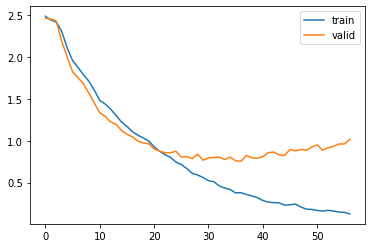

In [ ]:
# re usable function
def error_vs_epoch_plot(history):
    """
      Description :
        Graphical plot of Train-error and Test-error,
        vs. number of epoch
      Returns:
        None (Display in Notebook)
    """

    # Capturing learning history per epoch
    hist = pd.DataFrame(history.history)
    hist["epoch"] = history.epoch

    # Plotting accuracy at different epochs
    plt.plot(hist["loss"])
    plt.plot(hist["val_loss"])
    plt.legend(("train", "valid"), loc=0)


error_vs_epoch_plot(history)

In [ ]:
score = cnn_model.evaluate(X_test,y_test)

In [ ]:
print(score)

[0.9356762170791626, 0.7699859738349915]


In [ ]:
# training accuracy
accuracy_train = history.history.get("accuracy")[-1]
accuracy_train


0.9597398638725281

In [ ]:
# validation accuracy
accuracy_val = history.history.get("val_accuracy")[-1]
accuracy_val

0.7735148668289185

ACCURACY = 0.7699859747545582
F1 = 0.758583095455372
CPU times: user 912 ms, sys: 105 ms, total: 1.02 s
Wall time: 994 ms


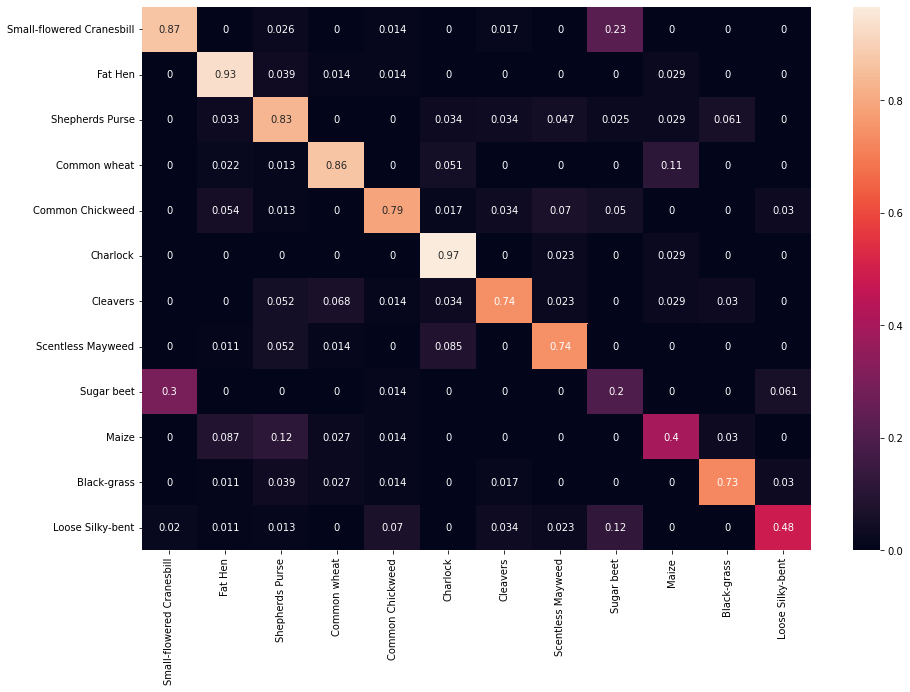

In [ ]:
%%time

def make_confusion_matrix(model, X_test, y_test,
            acc_train, acc_val, desc="", CATEGORIES=[]):
  """
    Description:
        Prints the confusion matrix formatted.
    Parameters:
        model : Sequential = classifier to predict values of X
        X_test: np.array = test set
        y_test : np.array = ground truth
        acc_train : float =
        acc_val : float =
        CATEGORIES : list of class names
        desc : str = description of model
    Returns:
        Dataframe containing accuracy value
  """


  # print(CATEGORIES)

  y_test_pred_ln = model.predict(X_test)
  y_test_pred_classes_ln = np.argmax(y_test_pred_ln, axis=1)


  accuracy =  accuracy_score(   np.argmax(y_test, axis=1),
      y_test_pred_classes_ln)
  print("ACCURACY =", accuracy)

  f1 = f1_score( np.argmax(y_test, axis=1),
                y_test_pred_classes_ln, average='weighted')
  print("F1 =", f1)

  cf_matrix = confusion_matrix(
      np.argmax(y_test, axis=1),
      y_test_pred_classes_ln
            )

  # Confusion matrix normalized per category true value
  cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
  plt.figure(figsize=(15,10))
  # sns.set_context("talk")  # talk : bolds the plots
  sns.heatmap(cf_matrix_n1, xticklabels=CATEGORIES,
              yticklabels=CATEGORIES, annot=True)
  # sns.set_context("notebook")  # talk : bolds the plots

  return pd.DataFrame( {"Description": desc,
                        "Accuracy-Train": acc_train,
                        "Accuracy-Validation": acc_val,
                        "Accuracy_Test": accuracy,
                        "F1": f1
                        },
                      index=[0] )

# save the results in a dataframe
df_scores = make_confusion_matrix(cnn_model, X_test, y_test,
              accuracy_train, accuracy_val,
              "CNN Keras.Sequential", CATEGORIES)

In [ ]:
# results recorded
df_scores


Description            Accuracy-Train  Accuracy-Validation  Accuracy_Test  \
0  CNN Keras.Sequential 0.9597          0.7735               0.7700           

   F1     
0 0.7586

In [ ]:
cnn_model.save("/content/drive/MyDrive/Colab Notebooks/UT-Austin/cnn_model_sequential.pkl")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/UT-Austin/cnn_model_sequential.pkl/assets


In [ ]:
!ls -al /content/drive/MyDrive/Colab\ Notebooks/UT-Austin

total 730
drwx------ 4 root root   4096 Oct 13 05:00 cnn_model_.pkl
drwx------ 4 root root   4096 Oct 13 05:25 cnn_model_sequential.pkl
drwx------ 2 root root   4096 Oct  3 14:53 data
-rw------- 1 root root 734617 Oct  3 13:54 Practice_Exercise_Computer_Vision_Week_1_Question_Notebook.ipynb


In [ ]:
del cnn_model

## 5.2 CNN Model : Keras.Model

Try various hyperparameters to improve Accuracy-Test

In [ ]:

# Para

class conv_Layers:

  def __init__(self, nfilters, kernel_size, stride=1,
               pool_size=2, leakyrelu_slope=0.1, dropc=0.0, bnorm=False):
    self.nfilters = nfilters
    self.kernel_size = kernel_size
    self.stride = stride
    self.pool_size = pool_size
    self.leakyrelu_slope = leakyrelu_slope
    self.dropfrac = dropc
    self.bnorm = bnorm

  def __call__(self, x):
    x = Conv2D(self.nfilters, kernel_size=self.kernel_size,
               strides=self.stride, padding='same')(x)
    x = LeakyReLU(self.leakyrelu_slope)(x)
    if (self.dropfrac > 0.0):
      x = Dropout(self.dropfrac)(x)
    if (self.bnorm):
      x = BatchNormalization()(x)
    x = MaxPool2D(self.pool_size)(x)
    return x

class dense_Layers:

  def __init__(self, nunits, leakyrelu_slope=0.1, dropd=0.0, bnorm=False):
    self.nunits = nunits
    self.leakyrelu_slope = leakyrelu_slope
    self.dropfrac = dropd
    self.bnorm = bnorm

  def __call__(self, x):
    x = Dense(self.nunits)(x)
    x = LeakyReLU(self.leakyrelu_slope)(x)
    if (self.dropfrac > 0.0):
      x = Dropout(self.dropfrac)(x)
    if (self.bnorm):
      x = BatchNormalization()(x)
    return x

def LNmodel(in_shape, conv_filters, dense_filters, kernel_size,
            num_classes, lr,
            stride=1, pool_size=2, leakyrelu_slope=0.1, dropc=0.0,
            dropd=0.0, bnorm=False):

  in_shape = X_train.shape[1:]
  i = Input(shape=in_shape)
  for ncl, nconvfilters in enumerate(conv_filters):
    if (ncl==0):
      x = conv_Layers(nconvfilters, kernel_size,
                      stride, pool_size, leakyrelu_slope, dropc, bnorm)(i)
    else:
      x = conv_Layers(nconvfilters, kernel_size,
                      stride, pool_size, leakyrelu_slope, dropc, bnorm)(x)

  x = Flatten()(x)

  for ndl, ndunits in enumerate(dense_filters):
    x = dense_Layers(ndunits, leakyrelu_slope, dropd, bnorm)(x)

  x = Dense(num_classes, activation='softmax')(x)

  ln_model  = Model(inputs=i, outputs=x)
  adam = optimizers.Adam(lr=lr)
  ln_model.compile(loss='categorical_crossentropy',
                   optimizer=adam, metrics=['accuracy'])

  return ln_model

In [ ]:
lr = 0.0001
kernelsize = 3
in_shape= X_train.shape[1:]
model_ln1 = LNmodel(in_shape, [5,5], [1024,1024,512], kernelsize, 12, lr,
                    stride=1, pool_size=4, leakyrelu_slope=0.001, dropc=0.25,
                    dropd=0.5, bnorm=False)
model_ln1.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 128, 128, 5)       140       
_________________________________________________________________
leaky_re_lu_60 (LeakyReLU)   (None, 128, 128, 5)       0         
_________________________________________________________________
dropout_109 (Dropout)        (None, 128, 128, 5)       0         
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 32, 32, 5)         0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 32, 32, 5)         230       
_________________________________________________________________
leaky_re_lu_61 (LeakyReLU)   (None, 32, 32, 5)         0  

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', min_delta=0.01,
                   verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy',
                     mode='max', verbose=1, save_best_only=True)

history_model_ln1 = model_ln1.fit(X_train, y_train,
                                  validation_split=0.2,
                                  verbose=1, batch_size=64,
                                  shuffle=True, epochs=200,
                                  callbacks=[es,mc])

Epoch 1/200
51/51 [==============================] - 2s 33ms/step - loss: 2.4656 - accuracy: 0.1174 - val_loss: 2.4398 - val_accuracy: 0.1262

Epoch 00001: val_accuracy improved from -inf to 0.12624, saving model to best_model.h5
Epoch 2/200
51/51 [==============================] - 1s 24ms/step - loss: 2.4384 - accuracy: 0.1338 - val_loss: 2.4322 - val_accuracy: 0.2054

Epoch 00002: val_accuracy improved from 0.12624 to 0.20545, saving model to best_model.h5
Epoch 3/200
51/51 [==============================] - 1s 25ms/step - loss: 2.4246 - accuracy: 0.1483 - val_loss: 2.4255 - val_accuracy: 0.2030

Epoch 00003: val_accuracy did not improve from 0.20545
Epoch 4/200
51/51 [==============================] - 1s 26ms/step - loss: 2.4100 - accuracy: 0.1641 - val_loss: 2.4102 - val_accuracy: 0.2550

Epoch 00004: val_accuracy improved from 0.20545 to 0.25495, saving model to best_model.h5
Epoch 5/200
51/51 [==============================] - 1s 29ms/step - loss: 2.3706 - accuracy: 0.2081 - val_

In [ ]:
error_vs_epoch_plot(history_model_ln1)

In [ ]:
score = model_ln1.evaluate(X_test,y_test)

23/23 [==============================] - 0s 9ms/step - loss: 1.2312 - accuracy: 0.5708


In [ ]:
score

[1.2312006950378418, 0.5708274841308594]

In [ ]:
# training accuracy
accuracy_train = history_model_ln1.history.get("accuracy")[-1]
accuracy_train

0.8120161294937134

In [ ]:
# validation accuracy
accuracy_val = history_model_ln1.history.get("val_accuracy")[-1]
accuracy_val

0.5581682920455933

ACCURACY = 0.5708274894810659
F1 = 0.5384993321844715


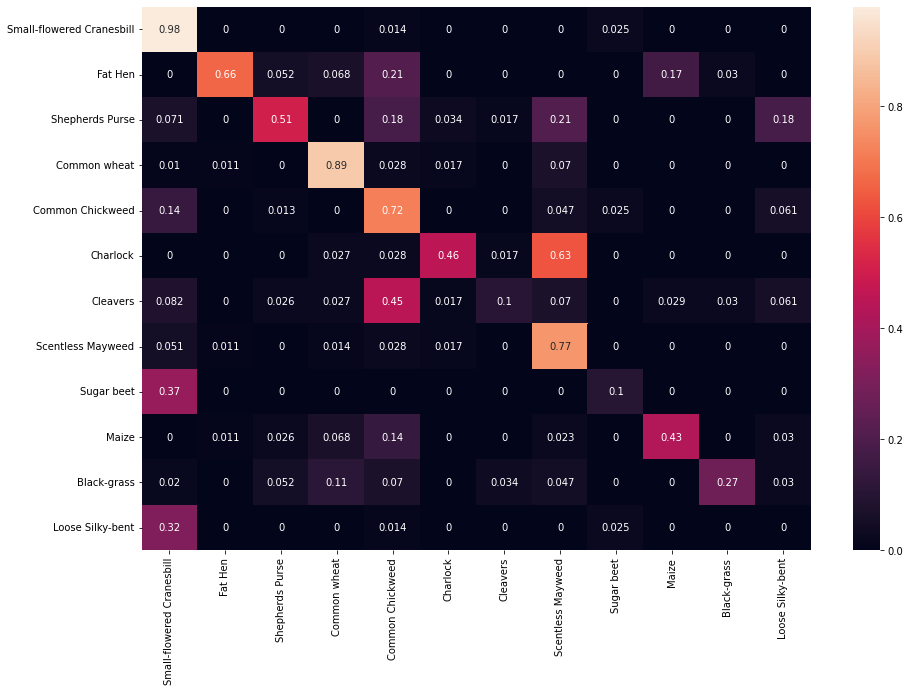

In [ ]:
# save the results in a dataframe
df_score_md = make_confusion_matrix(model_ln1, X_test, y_test,
              accuracy_train, accuracy_val,
              "CNN Keras.Model", CATEGORIES)

In [ ]:
df_score_md

Description       Accuracy-Train  Accuracy-Validation  Accuracy_Test  F1   
0  CNN Keras.Model 0.8120          0.5582               0.5708         0.5385

In [ ]:
df_scores = pd.concat([df_scores,df_score_md], axis=0, ignore_index=True)


In [ ]:
df_scores.sort_values(by=["Accuracy_Test", "F1"], ascending=False)

Description            Accuracy-Train  Accuracy-Validation  Accuracy_Test  \
0  CNN Keras.Sequential 0.9597          0.7735               0.7700           
1       CNN Keras.Model 0.8120          0.5582               0.5708           

   F1     
0 0.7586  
1 0.5385

In [ ]:
model_ln1.save("/content/drive/MyDrive/Colab Notebooks/UT-Austin/cnn_model_.pkl")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/UT-Austin/cnn_model_.pkl/assets


In [ ]:
!ls -al /content/drive/MyDrive/Colab\ Notebooks/UT-Austin

total 730
drwx------ 4 root root   4096 Oct 13 05:27 cnn_model_.pkl
drwx------ 4 root root   4096 Oct 13 05:25 cnn_model_sequential.pkl
drwx------ 2 root root   4096 Oct  3 14:53 data
-rw------- 1 root root 734617 Oct  3 13:54 Practice_Exercise_Computer_Vision_Week_1_Question_Notebook.ipynb


In [ ]:
del model_ln1

## 5.3 VGG16 Model - Transfer Learing

We'll use pre trained VGG16 Model, and train only some final layers before making predictions

In [ ]:
model_vgg16 = VGG16(include_top=True, weights='imagenet')
model_vgg16.summary()

In [ ]:
transfer_layer = model_vgg16.get_layer('block5_pool')
vgg_model = Model(inputs=model_vgg16.input,
                  outputs=transfer_layer.output)
vgg_model.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0  

In [ ]:
# we will choose which layers of VGG16 we actually want to fine-tune.
# Here we'll freeze all but the last few convolutional layer
for layer in vgg_model.layers[0:17]:
    layer.trainable = False
    print(layer.name, layer.trainable)

input_19 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False


In [ ]:
for layer in vgg_model.layers:
    print(layer.name, layer.trainable)

input_19 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 True
block5_pool True


In [ ]:
new_model = Sequential()

# adding the convolutional part of the VGG16 model from above.
new_model.add(vgg_model)

#
# new_model.add(Conv2D(512, (3,3), activation='relu',
#               padding = 'Same', input_shape=(14, 14, 512)))
# new_model.add(Conv2D(512, (3,3), activation='relu',
#               padding = 'Same'))
# new_model.add(Conv2D(512, (3,3), activation='relu',
#               padding = 'Same'))
# new_model.add(MaxPool2D(pool_size=(2,2), strides=(2, 2)))
# new_model.add(Dropout(0.25))
# #


# flattening the output of the VGG16 model
# because it is from a convolutional layer.
new_model.add(Flatten())

# add dense layers
# new_model.add(Dense(4096, activation = "relu"))
# new_model.add(Dropout(0.5))
# new_model.add(Dense(4096, activation = "relu"))
# new_model.add(Dropout(0.5))

# adding a dense output layer.
new_model.add(Dense(12, activation = "softmax"))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
new_model.compile(optimizer = optimizer ,
                  loss = "categorical_crossentropy",
              metrics=["accuracy"])
new_model.summary()

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', min_delta=0.01,
                   verbose=1, patience=5)
# mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy',
#                      mode='max', verbose=1, save_best_only=True)

history_new_model = new_model.fit(X_train, y_train,
                                  validation_split=0.2,
                                  verbose=1, batch_size=64,
                                  shuffle=True, epochs=30,
                                  callbacks=[es],
                                  use_multiprocessing=True)

Epoch 1/30


ValueError: ignored